# Agenda 
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 


In [63]:
import metrics as m
import cv2
from metrics import mse, ssim, dssim, lbp_tile_distance
import suport.patchesMethods as pm


In [64]:
sourcename = "1d798aa5d5"  #
sinName    = "9dd9bf98"  

In [65]:
original = f"tgs_salt\\{sourcename}.png"
sintese  = f"result\\{sinName}.jpg"

# load the two input images    0bdd44d530.png 1bd1c8c771 73be8191
imageA = cv2.imread(original,0)
imageB = cv2.imread(sintese,0)
if imageA is None or imageB is None:
    raise ValueError("Erro ao carregar as imagens. Verifique os caminhos.")


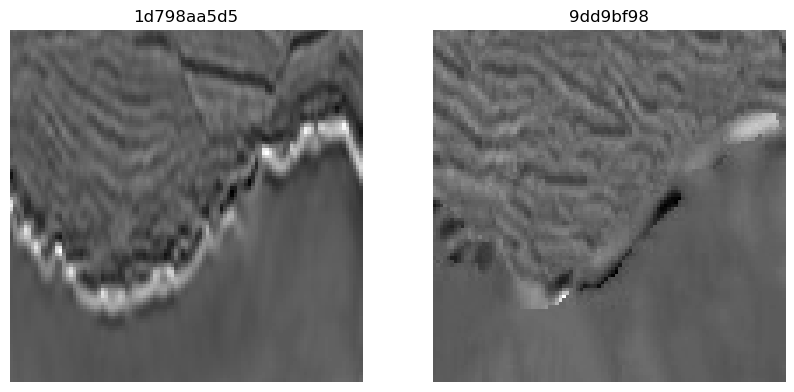

MSE        : 590.4522105675915
LBP E Dist : 0.4431939125061035
LBP T Dist: 0.04802314977719939
DSSIM      : 0.2826671009204238
SSIM       : 0.43466579815915246


In [66]:
images = [imageA,imageB]
titles = [sourcename, sinName]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the DSSIM between the two images
s = dssim(imageA, imageB)

oldssim = ssim(imageA, imageB)
# print(f"Old DSSIM  : {oldssim}")  # Old DSSIM is not used in the current code

# compute euclidean distance
lbp_td = lbp_distance(imageA, imageB)
# compute LBP tile distance
lbp_tile_dist = lbp_tile_distance(imageA, imageB)

print(f"MSE        : {m}")
print(f"LBP E Dist : {lbp_td}")
print(f"LBP T Dist: {lbp_tile_dist}")
print(f"DSSIM      : {s}")
print(f"SSIM       : {oldssim}")

In [6]:
dist = lbp_tile_distance(imageA, imageB)
print(f"LBP tile distance: {dist}")


LBP tile distance: 0.08019044022262194


# Leitura de csv para comparação de imagens

In [67]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm
import matplotlib.pyplot as plt
import os

In [68]:
#desenhar um bloxplot com os valores de mse, ssim e lbp_distance
def boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances):
    numsamples = len(mse_values)
    #titulo da figura
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.boxplot(mse_values)
    plt.title('MSE ')
    plt.subplot(1, 3, 2)
    plt.boxplot(lbp_distances)
    plt.title('LBP Distance ')
    plt.subplot(1, 3, 3)
    plt.boxplot(ssim_values)
    plt.title('DSSIM')
    plt.suptitle(f'{nomeOriginal} - {numsamples} samples', fontsize=16)
    plt.tight_layout()
  


In [17]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(listValues):
    min = np.min(listValues)
    q1 = np.percentile(listValues, 25)
    q2 = np.median(listValues)
    q3 = np.percentile(listValues, 75)
    max = np.max(listValues)
    print(f"   {min:.2f}, {q1:.2f}, {q2:.2f}, {q3:.2f}, {max:.2f}")
    #return min, q1, q2, q3, max
    

In [18]:
# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv', sep=';' , header=None)

   Min , Q1 , Median , Q3 , Max , Mean 
      MSE
      LBP Distance
      DSSIM


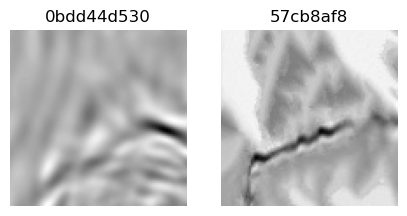

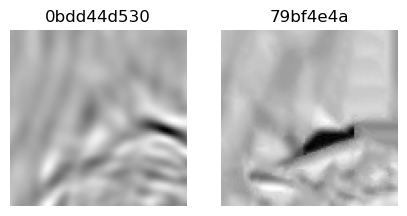

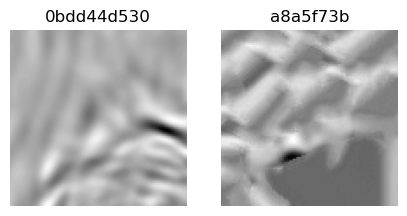

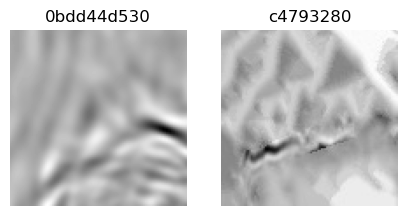

Group: 0bdd44d530 - Images: 4
   1231.08, 1655.75, 2054.75, 2330.50, 2385.39
   0.09, 0.13, 0.16, 0.18, 0.21
   0.29, 0.31, 0.32, 0.33, 0.34


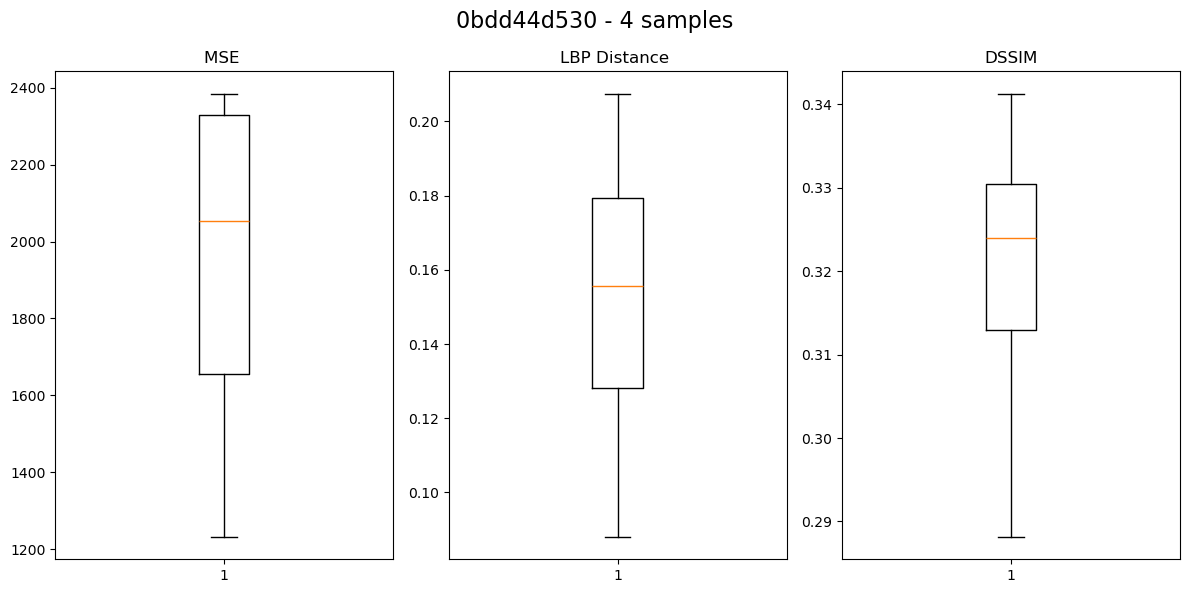

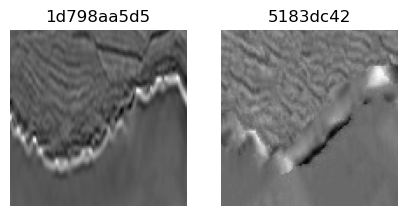

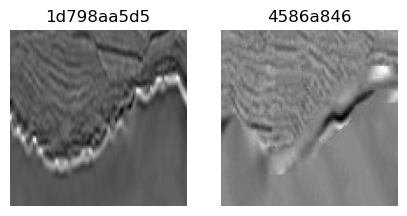

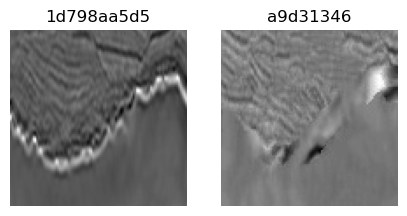

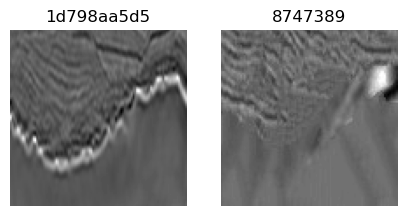

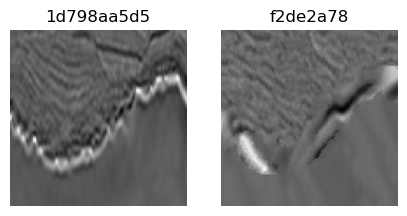

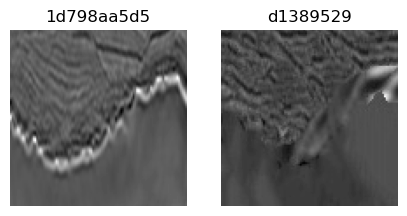

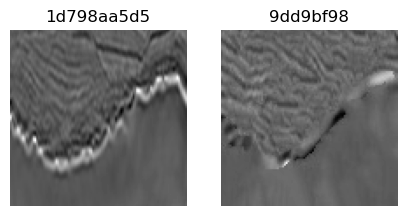

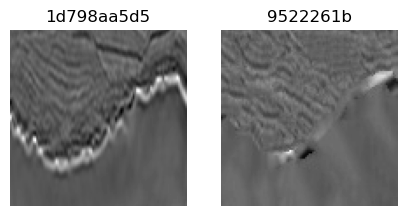

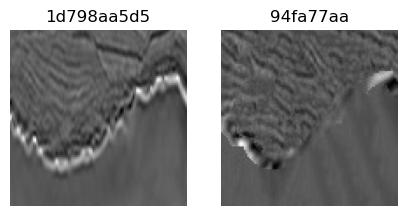

Group: 1d798aa5d5 - Images: 9
   563.84, 571.26, 596.85, 630.49, 734.40
   0.04, 0.06, 0.07, 0.08, 0.10
   0.27, 0.28, 0.28, 0.29, 0.30


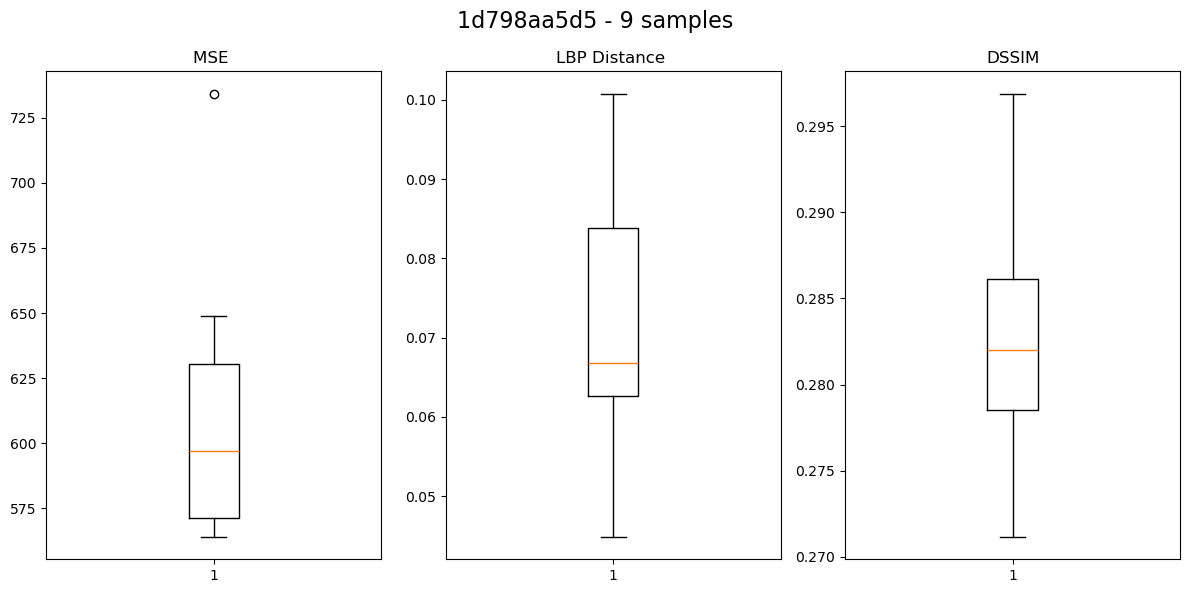

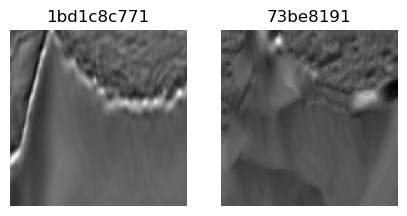

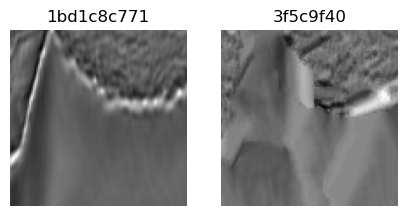

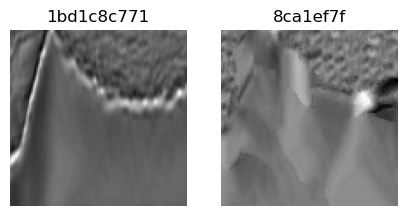

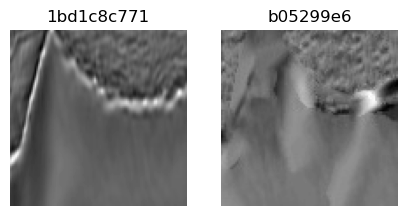

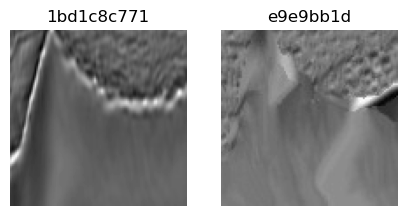

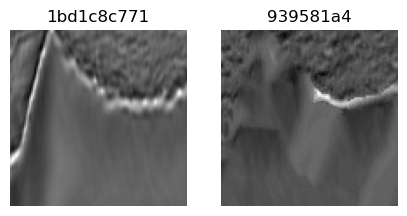

Group: 1bd1c8c771 - Images: 6
   673.28, 709.74, 733.51, 755.88, 764.25
   0.08, 0.09, 0.11, 0.11, 0.12
   0.24, 0.24, 0.25, 0.26, 0.26


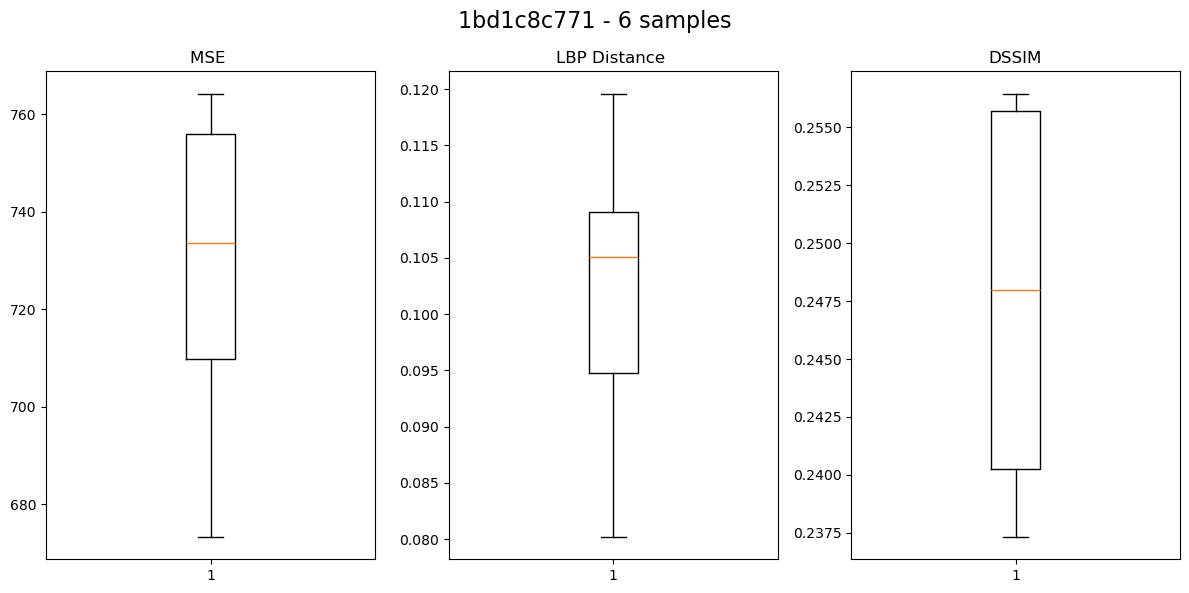

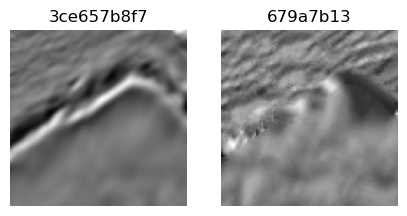

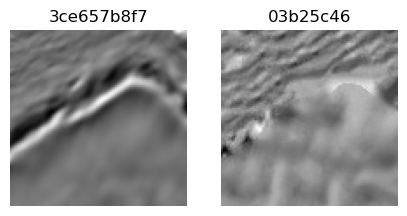

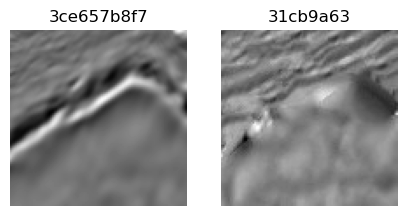

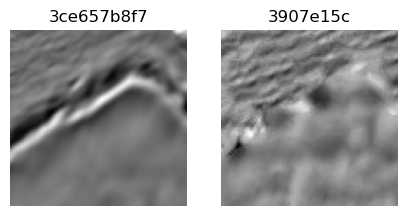

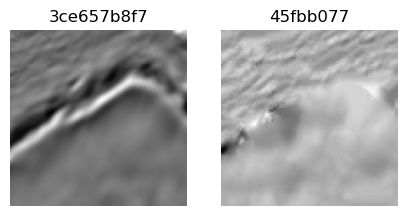

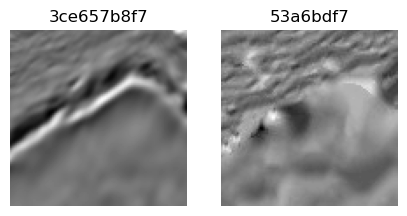

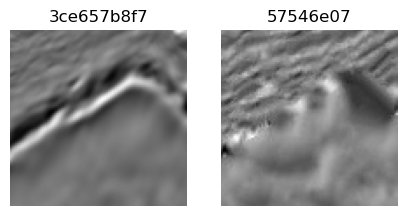

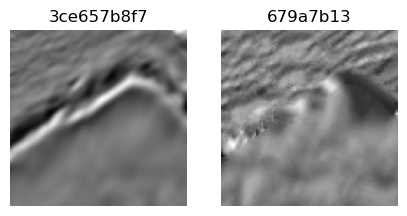

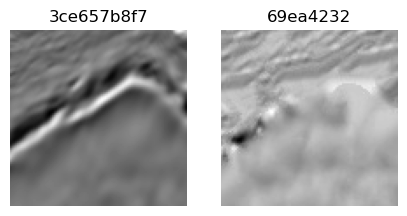

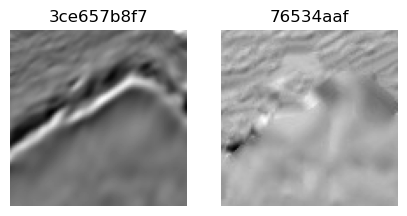

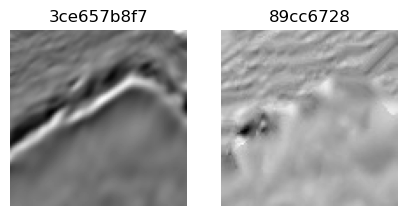

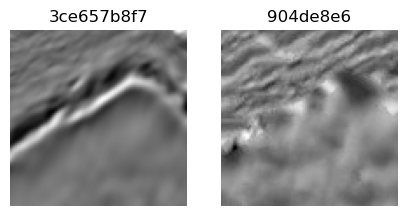

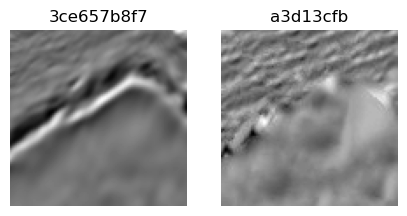

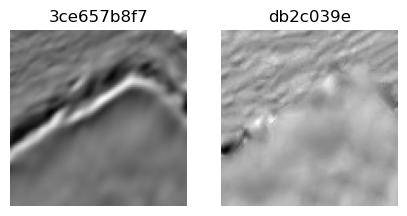

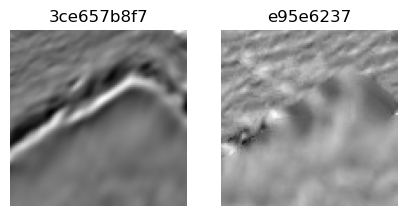

Group: 3ce657b8f7 - Images: 15
   992.93, 1069.72, 1088.30, 1127.21, 1171.50
   0.20, 0.21, 0.21, 0.22, 0.23
   0.27, 0.28, 0.29, 0.30, 0.30
Group: Total - Images: 34
   563.84, 680.64, 1013.46, 1114.23, 2385.39
   0.04, 0.09, 0.16, 0.21, 0.23
   0.24, 0.27, 0.28, 0.30, 0.34


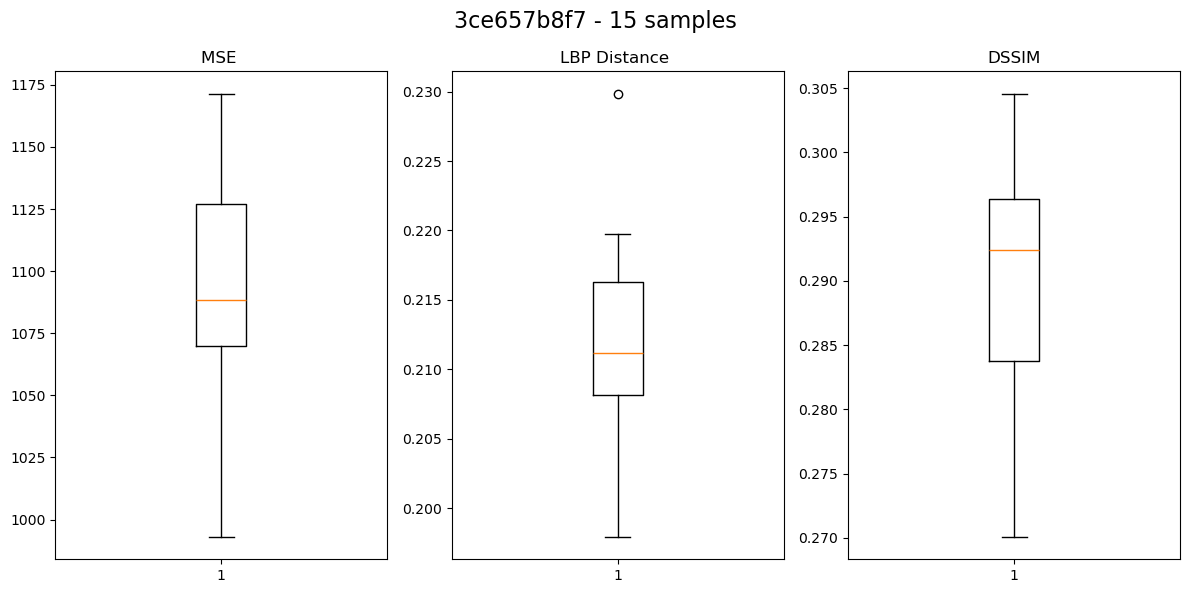

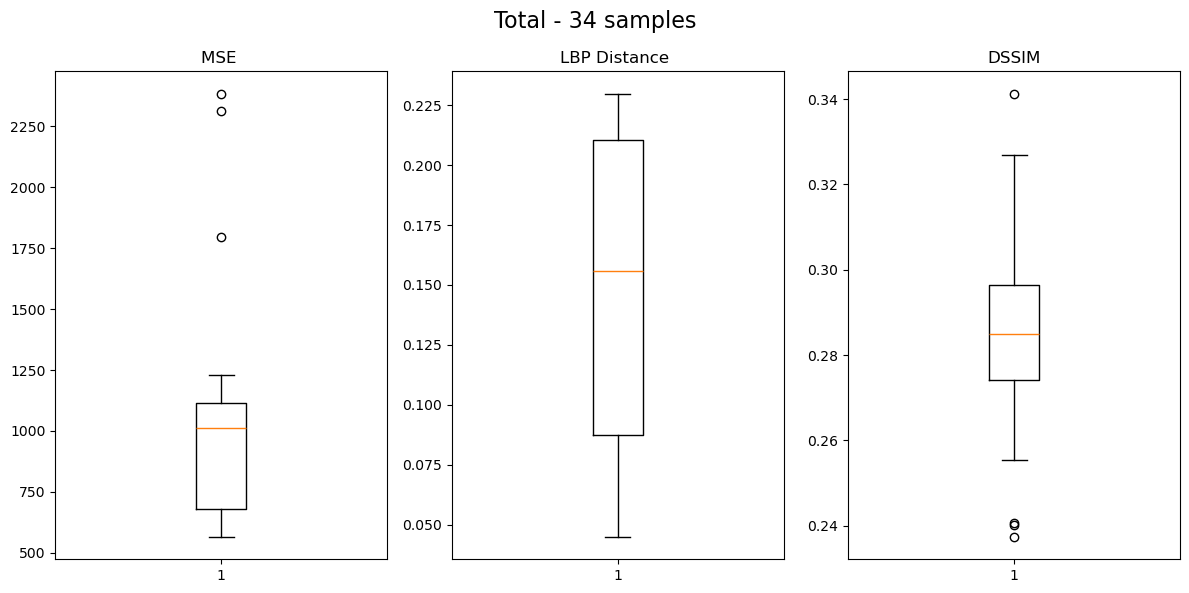

In [ ]:
imageA = 0
imageB = 0
mse_values = []
dssim_values = []
lbp_distances = []
mse_total = []
dssim_total = []
lbp_total = []

print(f"   Min , Q1 , Median , Q3 , Max , Mean ")
print(f"      MSE")
print(f"      LBP Distance")
print(f"      DSSIM")

for i, row in df_imgs.iterrows():
    for j, value in enumerate(row):
        if pd.notnull(value):
            if j == 0:
                nomeOriginal = value
                original = f"tgs_salt\\{value}.png"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(original):
                    print(f"File not found: {original}")
                    continue
                imageA = cv2.imread(original,0)
            else:
                nomeImage = value
                sintese = f"result\\{value}.jpg"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(sintese):
                    print(f"File not found: {sintese}")
                    continue
                imageB = cv2.imread(sintese,0)
                mse_value = mse(imageA, imageB)
                s = dssim(imageA, imageB)
                lbp_td = lbp_tile_distance(imageA, imageB) #lbp_distance(imageA, imageB) #lbp_tile_dist(imageA, imageB)
                print(f"MSE: {mse_value:.2f}, SSIM: {s:.2f}, LBPD: {lbp_td:.2f}")
                images = [imageA, imageB]
                titles = [nomeOriginal, nomeImage]
                pm.showImages(images=images, imagesTitle=titles, size=(5,5))
                mse_values.append(mse_value)
                dssim_values.append(s)
                lbp_distances.append(lbp_td)
    # stats do grupo
    if len(mse_values) == 0:
        print(f"No images found for group: {nomeOriginal}")
        continue
    # Salvar mse_values, ssim_values, lbp_distances em um arquivo CSV separado por ponto e vírgula.
    print(f"Group: {nomeOriginal} - Images: {len(mse_values)}")
   
    statistics(mse_values)
    statistics(lbp_distances)
    statistics(dssim_values)
    if len(mse_values) > 3:
         boxplot(nomeOriginal, mse_values, dssim_values, lbp_distances)
 
    mse_total = mse_total + mse_values
    lbp_total = lbp_total + lbp_distances
    dssim_total = dssim_total + dssim_values   
    
    mse_values = []
    dssim_values = []
    lbp_distances = []
# stats do grupo
print(f"Group: Total - Images: {len(mse_total)}")
statistics(mse_total)
statistics(lbp_total)
statistics(dssim_total)
boxplot('Total', mse_total, dssim_total, lbp_total)
  


In [ ]:
# Salvar os valores mínimos, q1, mediana, q3 e máximo em um arquivo CSV separado por ponto e vírgula.
stats_df = pd.DataFrame({
    'MSE': statistics(mse_values),
    'SSIM': statistics(dssim_values),
    'LBP Distance': statistics(lbp_distances)
}, index=['Min', 'Q1', 'Q2', 'Q3', 'Max' , 'Mean']).T
stats_df.to_csv('result\\metrics_statistics.csv', sep=';', index=True, float_format='%.2f')
# Exibir os resultados  
print("Estatísticas salvas em 'result\\metrics_statistics.csv'.")

# Listar produção do dia


In [10]:
import os
import datetime

directory = "result"
hoje = datetime.date.today()
print (f"Hoje: {hoje}")

#lista arquivos do diretorio
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        #extract .jpg
        name = filename[:-4]
        file_path = os.path.join(directory, filename)
        creation_time = os.path.getctime(file_path)
        creation_date = datetime.datetime.fromtimestamp(creation_time).date()
        if creation_date == hoje:
            print(f"{name}",end=',')



Hoje: 2025-06-05
